In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.robust.scale import mad
import scipy.io as sio
import hsutil
import csv
from importlib import reload
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-paper')

In [9]:
def plot_trace(t,tot,c='0.5',ax=None,label=None,indiv=True,med=False):
    if ax is None:
        ax = plt.gca()
    avg = np.nanmedian(tot,axis=0)
    if indiv:
        for trace in tot:
            ax.plot(t,trace,c=c,alpha=0.2)
    if med:
        medabs = mad(tot,c=1,axis=0)
        ax.fill_between(t,avg-medabs,avg+medabs,alpha=0.4,facecolor=c,edgecolor=None)
    ax.plot(t,avg,alpha=0.9,lw=0.75,c=c,label=label)
    return ax

In [4]:
fn = '/home/mliu/Dropbox/labwork/ML TRP/Molly Liu Manuscript/LiuVosshall2018/Fig2+3+S2+S3_heatseeking/LiuVosshall_Data_S3C.csv'
data = np.genfromtxt(fn, delimiter=',')

In [52]:
templabels = np.unique(data[:,0])
replabels = np.unique(data[:,1])
t = np.unique(data[:,2])
tot = np.empty([len(replabels),len(t)])

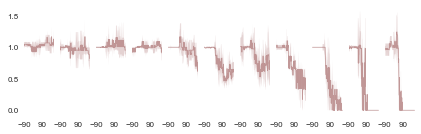

In [72]:
f,ax = plt.subplots(1,len(templabels),sharex=True,sharey=True)
f.set_size_inches([7,2])

for i in range(len(templabels)):
    tot = np.empty([len(replabels),len(t)])
    for j in range(len(replabels)):
        f = (data[:,0] == templabels[i])
        g = (data[:,1] == replabels[j])
        a = data[f & g,3]
        tot[j,:] = a
        nanfilt[j] = np.all(~np.isnan(tot[j,:]))
    tot = tot[nanfilt,:]
    plot_trace(t,tot,c='rosybrown',ax=ax[i],indiv=False,med=True)
    ax[i].set_xticks(range(-90,210,180))
    ax[i].grid(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
ax[1].set_xlim([-90,210])
plt.savefig('Fig3C.pdf')

In [57]:
i = 7
for j in range(len(replabels)):
    f = (data[:,0] == templabels[i])
    g = (data[:,1] == replabels[j])
    a = data[f & g,3]
    tot[j,:] = a

In [64]:
tot[np.all(~np.isnan(tot[j,:])) for j in range(len(replabels))]

SyntaxError: invalid syntax (<ipython-input-64-0ac798a5151f>, line 1)